In [76]:
import numpy as np
from scipy.misc import imread
from os import listdir
import imageio as imgio
import visvis as vv
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [64]:
DIRROOT = '../../assets/'
IMGS = DIRROOT + 'ImagenesCaras/'
IMGSRED = DIRROOT + 'ImagenesCarasRed/'
DIRSPERSONAS = [IMGS + archivo + '/' for archivo in listdir(IMGS)]
DIRSPERSONASRED = listdir(IMGSRED)

../../assets/ImagenesCaras/s33/1.pgm
[[ 88  79  77 ... 100 102 103]
 [ 80  69  86 ... 102 100 100]
 [ 64  71  86 ...  99 104 101]
 ...
 [192 191 200 ... 144 140 133]
 [194 199 200 ... 137 143 145]
 [189 202 200 ... 137 138 148]]


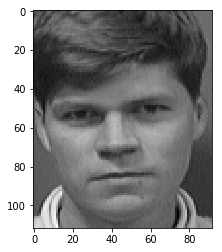

[ 88  79  77 ... 137 138 148]


In [65]:
personaimgsdir = DIRSPERSONAS[0]
imgs = listdir(personaimgsdir)
img = sorted(imgs)[0]

# Directorio
print(personaimgsdir + img)
imagen = imgio.imread(personaimgsdir + img)
#Imagen de clase Image que hereda de ndarray
print(imagen)
plt.imshow(imagen, plt.cm.gray)
plt.show()

#Imagen aplanada
print(imagen.flatten())

In [66]:
def imgs_de_dir(directorio):
    imagenes = listdir(directorio)
    return [imgio.imread(directorio+imagen) for imagen in imagenes]
def imgs_flat_de_dir(directorio):
    return [img.flatten() for img in imgs_de_dir(directorio)]

In [90]:
personas = DIRSPERSONAS
neigh = KNeighborsClassifier(n_neighbors=3)
trainX = []
trainY = []
testX = []
testY = []
index = 0
for persona in personas:
    index += 1
    imgs = imgs_flat_de_dir(persona)
    for img in imgs[:-2]:
        trainX.append(img)
        trainY.append(index)
    for img in imgs[-2:]:    
        testX.append(img)
        testY.append(index)
neigh.fit(trainX, trainY)
neigh.score(testX, testY)

0.926829268292683